# Econet Customer Service Sentiment Analysis

This is a continuation from the previous notebook. The previous notebook was about cleaning the data. This one is about analysis. Let's list our objectives again to keep within our scope of the project.

## Primary Objective:
 - A time series analysis of how the frequency of complaints on service has changed over the last 9 years.

## Other Objectives:
 - Which month does Econet experience the most complaints?
 - Which type of complaint is most prevalent? How do these complaint categories change over time?
 - How often do customers complain that their enquiries are being ignored?
 - Which Econet SBU experiences the most customer complaints?
 - Is there a certain cluster/segment of Econet's customers that experience poor service the most?
 - Has there been a change in the percentage of complaints that Econet gets as its market share has changed over the years?
 - How does Econet's customer service compare to it's competitors?

Let's import relevant packages.

In [63]:
import pandas as pd
import numpy as np
import re
import warnings
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as ticker
import seaborn as sns

%matplotlib inline

from wordcloud import WordCloud
from datetime import datetime

from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

In [3]:
data = pd.read_csv('/home/simbarashe/Desktop/EconetSentimentAnalysis/data_clean_main.csv', index_col=0)

In [20]:
data.tail()

,likes,replies,retweets,text,user_screen_name,tidy_tweet,tokenized_tweet,MNO_label,lang,sentiment
created_at,,,,,,,,,,
2014-11-25 12:36:02,2,1,1,@stewardbank if only all customer care agents ...,ralphtaa,steward if only all customer care agents woul...,"['stewardbank', 'if', 'only', 'all', 'customer...",e,True,pos
2014-11-15 05:29:55,2,0,1,@moyo_buhle @econet_support Worry not buddie @...,mykdoma,moyo buhle econet support worry not buddie ...,"['moyo', 'buhle', 'econet', 'support', 'worry'...",e,True,pos
2014-10-17 12:36:13,3,1,2,@econet_support @econetzimbabwe since you inco...,dexterbaysiq,econet support econet since you inconvenienc...,"['econet', 'support', 'econetzimbabwe', 'since...",e,True,pos
2014-10-09 06:15:07,2,1,2,@econet_support cab you explain that to me? An...,costadisa,econet support cab you explain that to me an...,"['econet', 'support', 'cab', 'you', 'explain',...",e,True,pos
2013-12-10 13:17:26,0,0,2,"""@econet_support: What about #Twitter bundles?...",Itskarizma,econet support what about # s if you want...,"['econet', 'support', 'what', 'about', '#', 'b...",e,True,pos


In [16]:
dat_drop = data[data['user_screen_name'].str.contains('jacksonmadzimba|MuzindaHub|HigherLifeFDN|neildrewitt', regex=True)]

In [17]:
data.drop(dat_drop.index, inplace=True)

In [5]:
data.index = pd.to_datetime(data.index)

### Customer complaints/enquiries by MNO

Let's begin by categorizing our data into respective MNOs.

In [21]:
data_econet = data[(data['MNO_label']=='e') | (data['MNO_label']=='ec')]

In [23]:
print('Econet has {} enquiries/complaints betweend Dec 2013 and March 2019'.format(data_econet.shape[0]))

Econet has 2133 enquiries/complaints betweend Dec 2013 and March 2019


In [13]:
data_comp = data[data['MNO_label']=='c']

In [24]:
print("Econet's competitors have a combined {} complaints/enquiries within the same period".format(data_comp.shape[0]))

Econet's competitors have a combined 477 complaints/enquiries within the same period


### Visualizing the data

Let's plot a daily time series of the customer enquiries over the years for Econet and its competitors.

First, we need to add an 'enquiry_count' column to our data which we can aggregate over.

In [26]:
data.shape[0]

2610

In [27]:
count_array = np.full(2610, 1)

In [28]:
data['enquiry_count'] = count_array

Let's update our MNO dataframes.

In [29]:
data_econet = data[(data['MNO_label']=='e') | (data['MNO_label']=='ec')]
data_comp = data[data['MNO_label']=='c']

In [84]:
sns.set(rc={'figure.figsize':(12, 5)})

In [64]:
warnings.filterwarnings("ignore", category=pd.core.common.SettingWithCopyWarning)

In [65]:
data_econet.sort_index(inplace=True)
data_comp.sort_index(inplace=True)

In [67]:
data_econet.tail(1)

,likes,replies,retweets,text,user_screen_name,tidy_tweet,tokenized_tweet,MNO_label,lang,sentiment,enquiry_count
created_at,,,,,,,,,,,
2019-03-26 17:02:22,1,1,1,was using econet twtter..ndaa paden manje n th...,Luke_Snow69,was using econet twtter ndaa paden manje n th...,"['was', 'using', 'econet', 'twtter', 'ndaa', '...",e,True,neutral,1


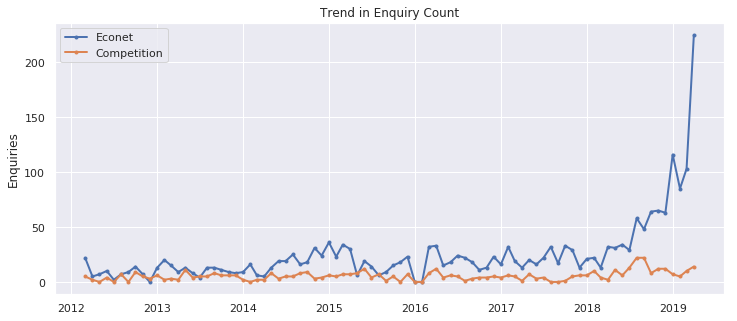

In [85]:
fig, ax = plt.subplots()
ax.plot(data_econet['enquiry_count'].resample("M", convention='end').sum(), marker='.', linewidth=2, label="Econet")
ax.set_ylabel("Enquiries")
ax.set_title("Trend in Enquiry Count")
ax.plot(data_comp['enquiry_count'].resample("M", convention='end').sum(), marker='.', linewidth=2, label="Competition")
ax.legend()
plt.grid(which='minor', axis='both')

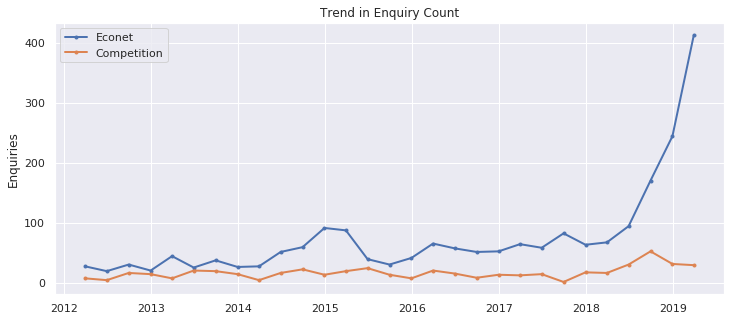

In [86]:
fig, ax = plt.subplots()
ax.plot(data_econet['enquiry_count'].resample("Q", convention='end').sum(), marker='.', linewidth=2, label="Econet")
ax.set_ylabel("Enquiries")
ax.set_title("Trend in Enquiry Count")
ax.plot(data_comp['enquiry_count'].resample("Q", convention='end').sum(), marker='.', linewidth=2, label="Competition")
ax.legend()
plt.grid(which='minor', axis='both')

 - The trend in both aggregations of by month and by quarter show that the enquiries are mostly average from 2012 to the first quarter of 2014.
 - From then on, there's a steady rise to 2015. The numbers take a sharp dip after the first quarter of 2015 then stabilize until the second quarter of 2018.
 - From here, the numbers rise sharply, very suddenly through to 2019.

Let's investigate Why there are so much complaints from June 2018 onwards.

In [89]:
print(data_econet.loc['2018-06':].shape[0])
data_econet.loc['2018-06':]

856


,likes,replies,retweets,text,user_screen_name,tidy_tweet,tokenized_tweet,MNO_label,lang,sentiment,enquiry_count
created_at,,,,,,,,,,,
2018-06-01 17:05:07,29,12,11,ECONET Wireless Zimbabwe Limited (EWZL) has re...,NewsDayZimbabwe,econet limited ewzl has registered a near ...,"['econet', 'wireless', 'zimbabwe', 'limited', ...",e,True,neutral,1
2018-06-02 22:50:20,20,5,9,"Kwese TV, a unit of Econet Media, has created ...",bustoptv,kwese tv a unit of econet has created ...,"['kwese', 'tv', 'a', 'unit', 'of', 'econet', '...",e,True,neutral,1
2018-06-03 17:08:16,16,2,11,Barclays Bank profits - 83%; Old Mutual 139%; ...,GwisaiMunya,barclays profits old mutual econ...,"['barclays', 'bank', 'profits', 'old', 'mutual...",e,True,neutral,1
2018-06-05 16:10:15,97,23,17,I was just talking to a 22 year old who didn’t...,T1mbles,i was just talking to a year old who didn t...,"['i', 'was', 'just', 'talking', 'to', 'a', 'ye...",e,True,neg,1
2018-06-06 12:17:42,21,2,18,"View your Call Records, monitor your Data Usag...",buzy263,view your call records monitor your data usag...,"['view', 'your', 'call', 'records', 'monitor',...",e,True,pos,1
2018-06-06 18:14:41,30,12,6,Random Tweet\nShingi Mtasa performed the only ...,matigary,random tweet shingi mtasa performed the only ...,"['random', 'tweet', 'shingi', 'mtasa', 'perfor...",e,True,neutral,1
2018-06-10 17:30:51,54,0,26,"Econet leads in use of clean energy, puts enti...",263Chat,econet leads in use of clean energy puts enti...,"['econet', 'leads', 'in', 'use', 'of', 'clean'...",e,True,neutral,1
2018-06-10 19:39:47,53,4,9,Theres nothing more frustrating than trying to...,AfricanFlamingo,theres nothing more frustrating than trying to...,"['theres', 'nothing', 'more', 'frustrating', '...",e,True,neg,1
2018-06-10 19:59:07,39,5,8,One guy right now is promising someone's innoc...,tashboy01,one guy right now is promising someone s innoc...,"['one', 'guy', 'right', 'now', 'is', 'promisin...",e,True,neutral,1
